### Understanding data

In [39]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('/HouseListings-Top45Cities-10292023-kaggle.csv',encoding = 'latin1')
print(f'This dataset contains {df.shape[0]} samples and {df.shape[1]} features')

This dataset contains 35768 samples and 10 features


In [41]:
# Looking at the few rows of data randomly
df.sample(5)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
27301,Maple Ridge,1385000.0,12453 BLANSHARD STREET,3,3,British Columbia,90990,49.2167,-122.6000,105000.0
7928,Hamilton,639900.0,110 EAST 14TH Street,3,2,Ontario,729560,43.2567,-79.8692,91000.0
9332,Kitchener,2192000.0,922 DOON VILLAGE Road,5,6,Ontario,522888,43.4186,-80.4728,92000.0
10727,London,895900.0,LOT 153 HEATHWOODS Avenue,2,3,Ontario,423369,42.9836,-81.2497,79500.0
25545,White Rock,2198000.0,20732 46 AVENUE,5,3,British Columbia,109167,49.0250,-122.8028,73000.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [43]:
df.isnull().sum()

,0
City,0
Price,0
Address,0
Number_Beds,0
Number_Baths,0
Province,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [44]:
df.duplicated().sum()

np.int64(2516)

There are around 2,500 dupplicate values in our dataset. I will go ahead and remove these duplicates

In [45]:
# Drop the duplicate rows in the data
df.drop_duplicates(inplace = True)

In [46]:
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.325200e+04,33252.000000,33252.000000,3.325200e+04,33252.000000,33252.000000,33252.000000
mean,9.780968e+05,3.294388,2.555786,6.592545e+05,47.272550,-98.419248,89898.860911
std,1.041994e+06,1.747455,1.385224,1.148804e+06,3.307946,22.728483,12351.789458
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.950000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.600000,82000.000000
50%,7.249000e+05,3.000000,2.000000,2.424600e+05,48.428300,-104.606700,89000.000000
75%,1.124900e+06,4.000000,3.000000,7.295600e+05,49.266700,-79.676900,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [47]:
# Drop the 'Address', 'Latitude' and 'Longitude' columns. I will not use this column to make predictions.
df.drop(['Address','Latitude','Longitude'],axis = 1, inplace = True)

In [48]:
# Drop non-snsical rows from our data. E.g., dropping the row where number of beds is more than 20 and number of bathrooms is more than 10
beds_more_than_20_idx = df[df['Number_Beds'] > 20].index
df.drop(beds_more_than_20_idx,inplace = True)

baths_more_than_10_idx = df[df['Number_Baths'] > 10].index
df.drop(baths_more_than_10_idx, inplace = True)

# There are some data points where the number of bedrooms and number of bathrooms are both 0. These data points do not make sense to me.
# I will drop these daata points
zero_rooms_idx = df[(df['Number_Baths'] == 0) & (df['Number_Beds'] == 0)].index
df.drop(zero_rooms_idx, inplace = True)

# Replacing the value of the number of bedrooms with more than 4 bedrooms to '>4'
greater_than_4_beds_idx = df[df['Number_Beds'] > 4].index
df.loc[greater_than_4_beds_idx,'Number_Beds'] = '>4'
df['Number_Beds'] = df['Number_Beds'].apply(str)

#Replacing the value of the number of bathrooms with more than 3 bathrooms to '>3'
greater_than_3_baths_idx = df[df['Number_Baths'] > 3].index
df.loc[greater_than_3_baths_idx,'Number_Baths'] = '>3'
df['Number_Baths'] = df['Number_Baths'].apply(str)

/tmp/ipython-input-2983516105.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '>4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[greater_than_4_beds_idx,'Number_Beds'] = '>4'
/tmp/ipython-input-2983516105.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '>3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[greater_than_3_baths_idx,'Number_Baths'] = '>3'


In [49]:
df.sample(5)

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
23858,Red Deer,579900.0,4,>3,Alberta,100844,85000.0
27615,Maple Ridge,1080000.0,>4,3,British Columbia,90990,105000.0
3689,Calgary,759900.0,4,3,Alberta,1306784,100000.0
22928,Thunder Bay,529900.0,3,2,Ontario,108843,80000.0
29317,New Westminster,1529900.0,4,3,British Columbia,78916,82000.0


In [50]:
print(f'The size of the data after dropping rows and columns of the data is :- Number of rows: {df.shape[0]} | Number of columns: {df.shape[1]}')

The size of the data after dropping rows and columns of the data is :- Number of rows: 32757 | Number of columns: 7


Observations:
1. There are no missing values in this dataset.
2. This dataset has some numerical as well as some categorical columns in this dataset.
3. There are some outliers present in this dataset. The maximum number of beds in 109 where are the number of bathrooms is 59. I will remove the outliers from this dataset.
4. There are some dupplicate values in our dataset (around 2.5K samples in the entire data). I have removed these duplicate entries from our data
5. The mean of the median family income is a little under 90K CAD
6. I have dropped some of the data points that do not make sense to me.

### Exploratory Data Analysis

#### Univariate Analysis

In [51]:
# Replacing the long province names with shorter names. E.g., Ontario -> ON | Alberta -> AB
# Replacing this will help in data visualization
def short_province(df):
    long_name_list = ['Ontario','British Columbia', 'Alberta', 'Saskatchewan', 'Newfoundland and Labrador', 'New Brunswick', 'Quebec', 'Manitoba','Nova Scotia']
    short_name_list = ['ON', 'BC', 'AB', 'SK', 'NL', 'NB', 'QC', 'MB', 'NS']
    for i in range(len(long_name_list)):
        df.replace(to_replace = long_name_list[i],value = short_name_list[i],inplace = True)

short_province(df)

/tmp/ipython-input-4174366084.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Province', data = df, palette = 'Blues')


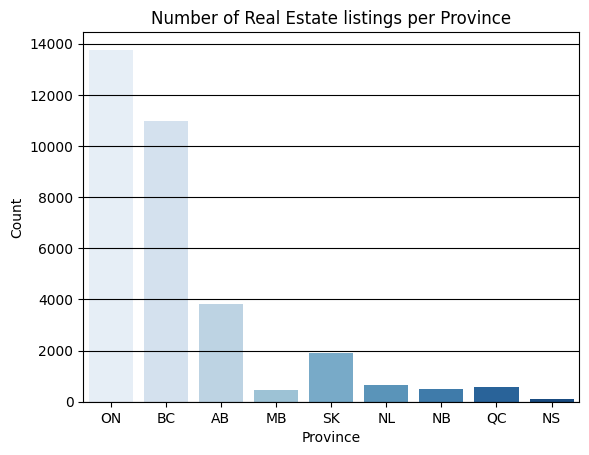

In [52]:
sns.countplot(x = 'Province', data = df, palette = 'Blues')
plt.grid(axis = 'y',color = 'black')
plt.ylabel('Count')
plt.title("Number of Real Estate listings per Province")
plt.show()

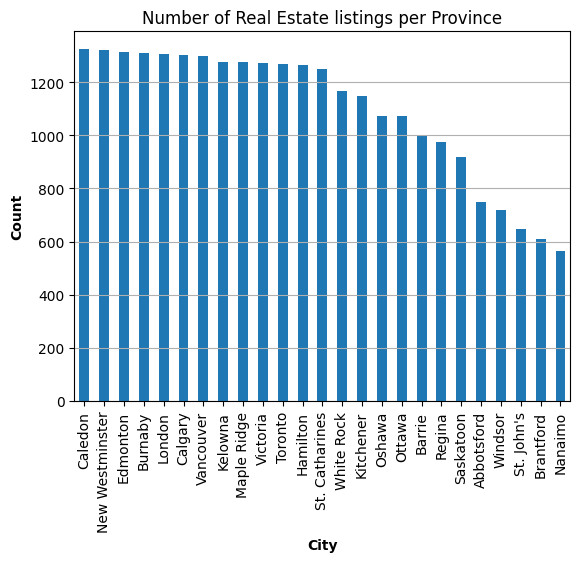

In [53]:
df['City'].value_counts().head(25).plot(kind = 'bar')
plt.grid(axis = 'y')
plt.title("Number of Real Estate listings per Province")
plt.xlabel("City",fontweight = 'bold')
plt.ylabel("Count", fontweight = 'bold')
plt.show()

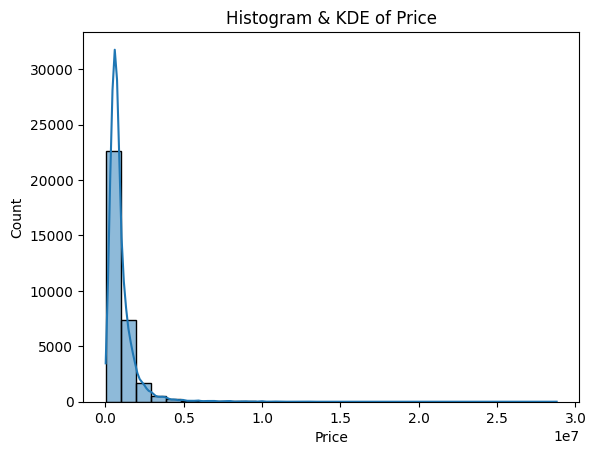

In [54]:
sns.histplot(df['Price'],kde = True, bins = 30)
plt.title('Histogram & KDE of Price')
plt.show()

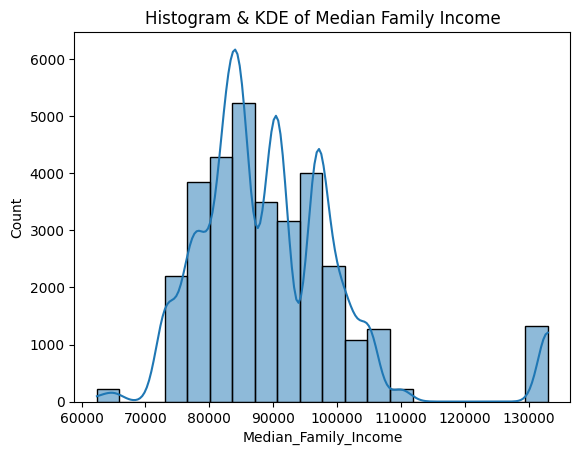

In [55]:
sns.histplot(df['Median_Family_Income'],kde = True, bins = 20)
plt.title('Histogram & KDE of Median Family Income')
plt.show()

Observations:
1. Ontario has the highest number of house listings in Canada whereas Nova Scotia has the lowest number of house listings.
2. From the Histogram of the 'price' feature, I can see that there are outliers. Some of the properties are selling for more than 10 Million CAD.
3. The median family income for majority of Canadians lies between 75K to 115K CAD. There are some households whose median income is more than 130K CAD per year. There are also some families whose median income is close to 65K CAD per year.
4. Edmonton has the highest number of listings in this dataset.
5. Price follows a power law distribution whereas the median family income feature follows a multimodal distribution. We should try to make these features close to normal distribution.

#### Multivariate Analysis

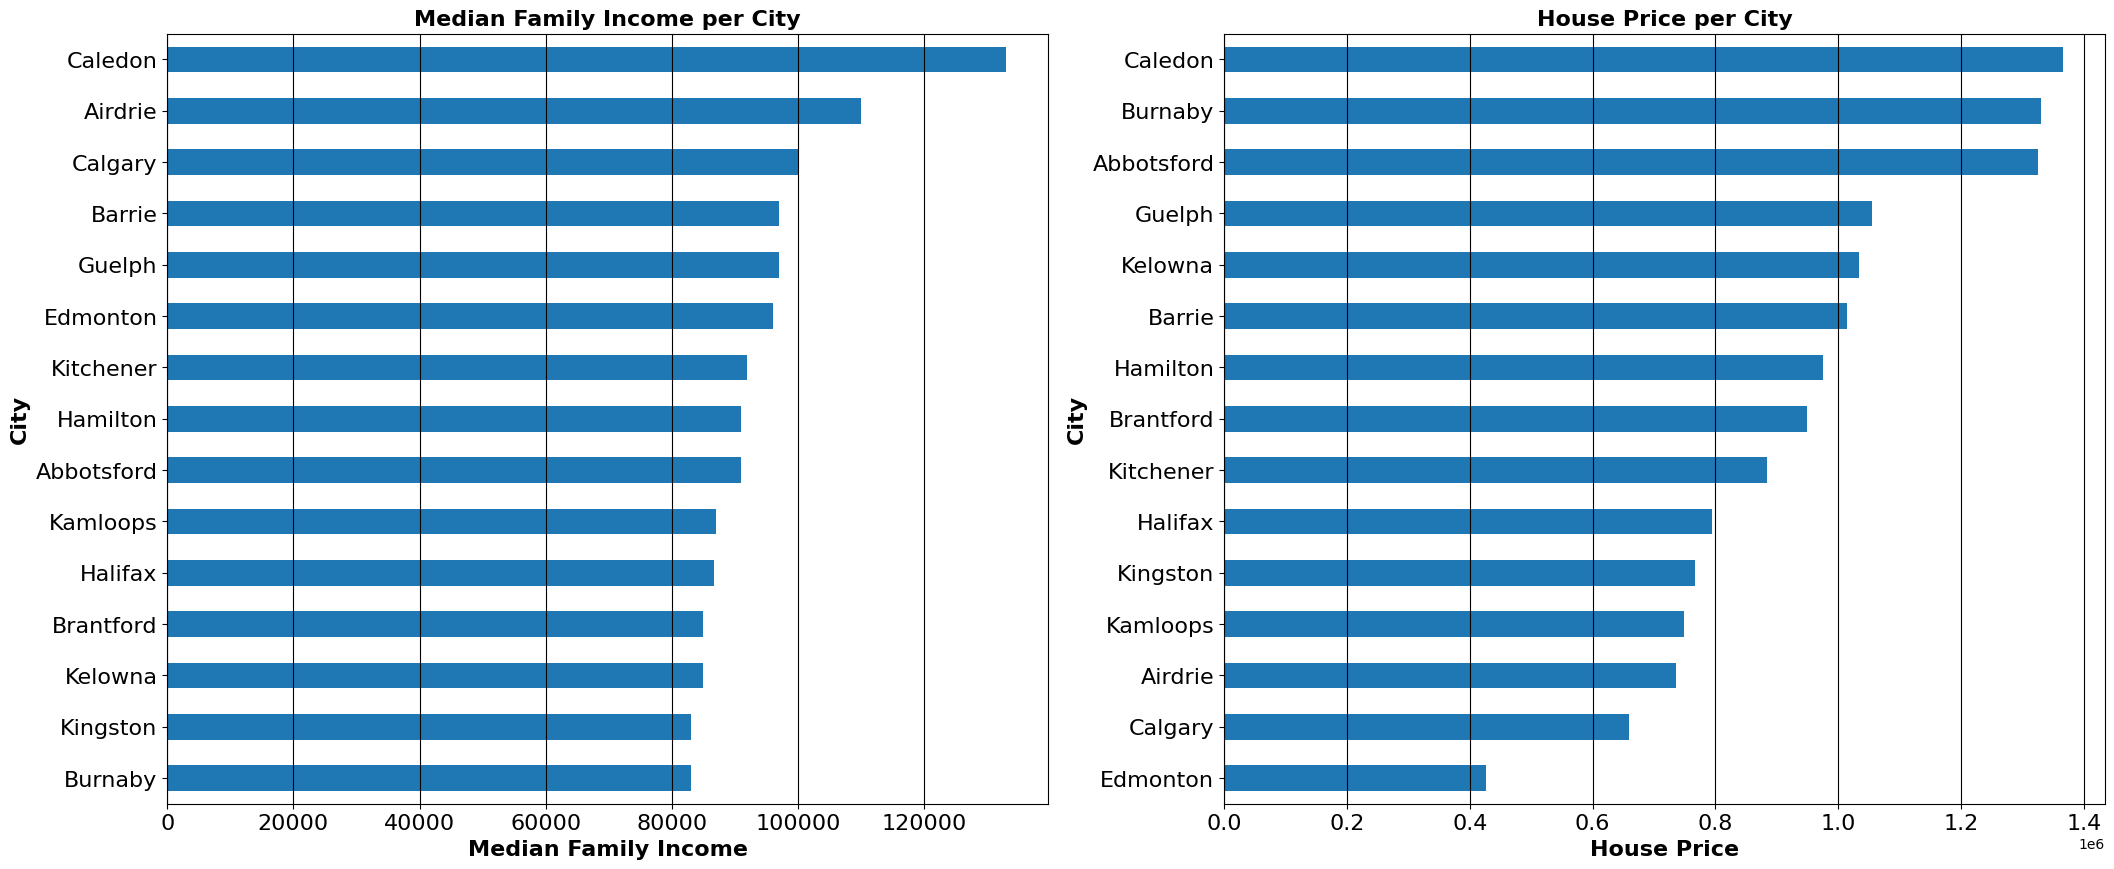

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (25,10))

df.groupby('City')['Median_Family_Income'].mean().head(15).sort_values().plot(kind = 'barh',ax = ax[0])
ax[0].set_ylabel('City',fontweight = 'bold', fontsize = 16)
ax[0].set_xlabel('Median Family Income', fontweight = 'bold', fontsize = 16)
ax[0].set_title('Median Family Income per City', fontweight = 'bold', fontsize = 16)
ax[0].grid(axis = 'x',color = 'black')
ax[0].tick_params(axis='both', labelsize=16, rotation = 0)

df.groupby('City')['Price'].mean().head(15).sort_values().plot(kind = 'barh', ax = ax[1])
ax[1].set_ylabel('City',fontweight = 'bold', fontsize = 16)
ax[1].set_xlabel('House Price', fontweight = 'bold', fontsize = 16)
ax[1].set_title('House Price per City', fontweight = 'bold', fontsize = 16)
ax[1].grid(axis = 'x',color = 'black')
ax[1].tick_params(axis='both', labelsize=16, rotation = 0)

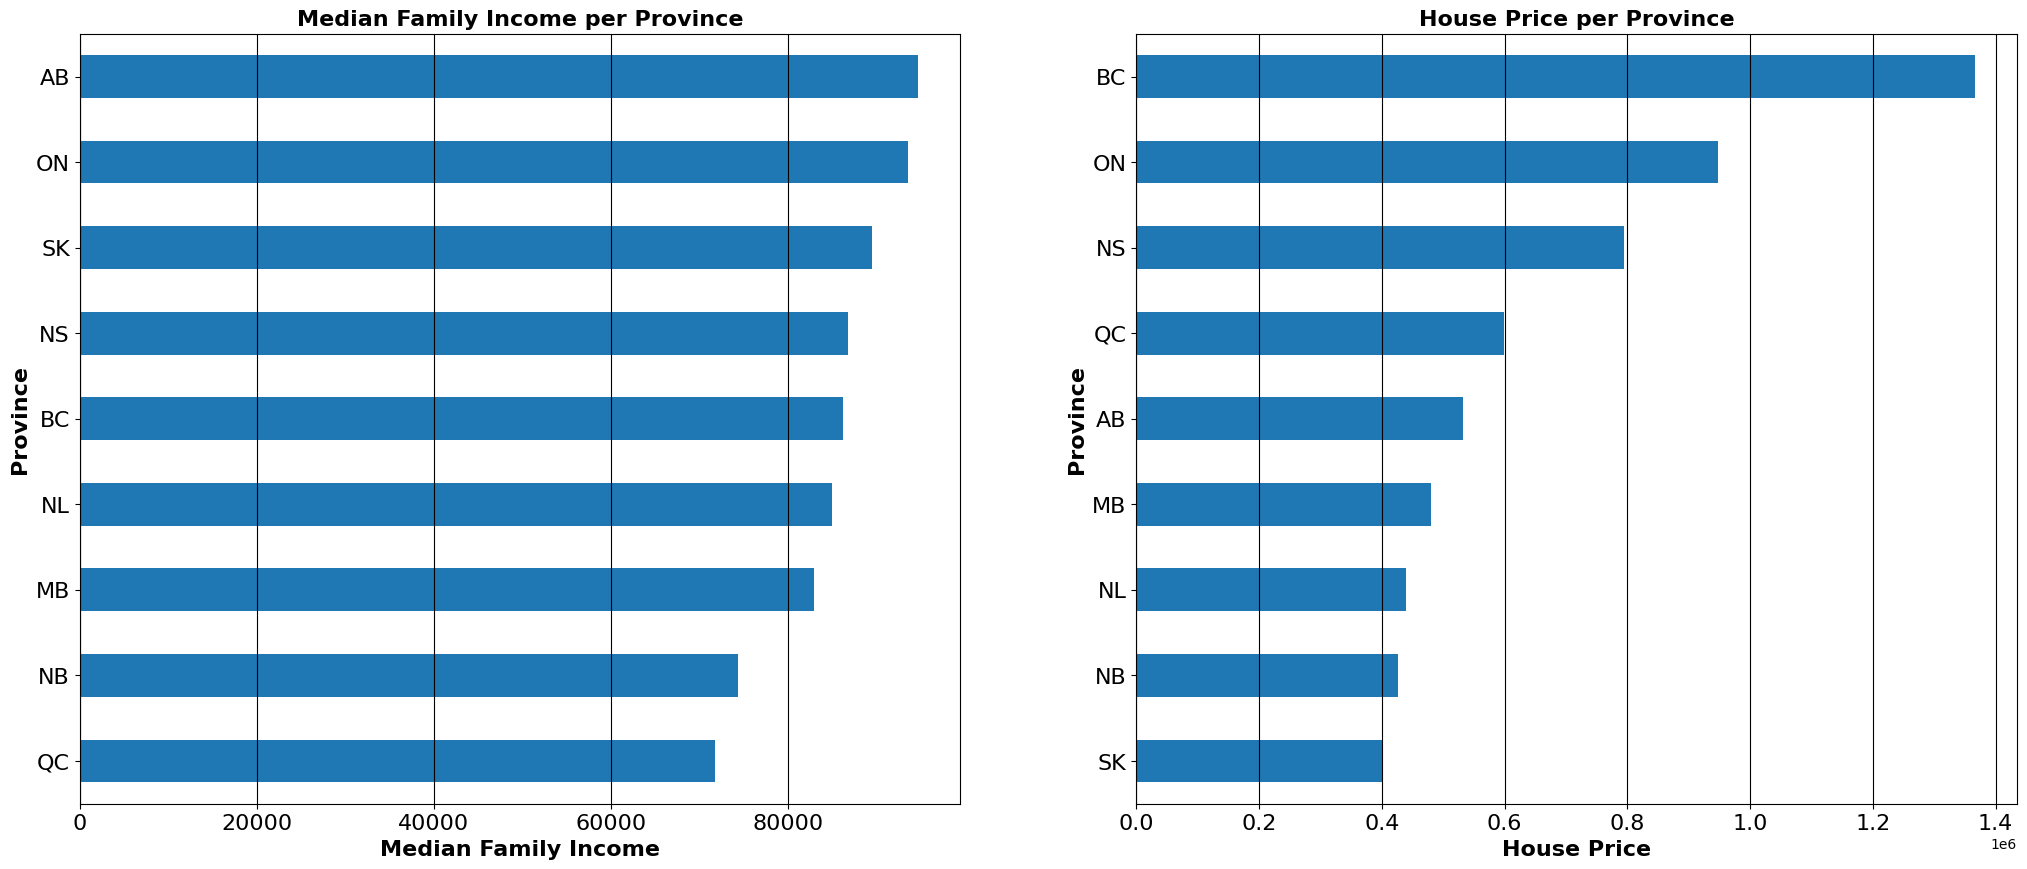

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize = (25,10))

df.groupby('Province')['Median_Family_Income'].mean().sort_values().plot(kind = 'barh',ax = ax[0])
ax[0].set_ylabel('Province',fontweight = 'bold', fontsize = 16)
ax[0].set_xlabel('Median Family Income', fontweight = 'bold', fontsize = 16)
ax[0].set_title('Median Family Income per Province', fontweight = 'bold', fontsize = 16)
ax[0].grid(axis = 'x',color = 'black')
ax[0].tick_params(axis='both', labelsize=16, rotation = 0)

df.groupby('Province')['Price'].mean().sort_values().plot(kind = 'barh', ax = ax[1])
ax[1].set_ylabel('Province',fontweight = 'bold', fontsize = 16)
ax[1].set_xlabel('House Price', fontweight = 'bold', fontsize = 16)
ax[1].set_title('House Price per Province', fontweight = 'bold', fontsize = 16)
ax[1].grid(axis = 'x',color = 'black')
ax[1].tick_params(axis='both', labelsize=16, rotation = 0)

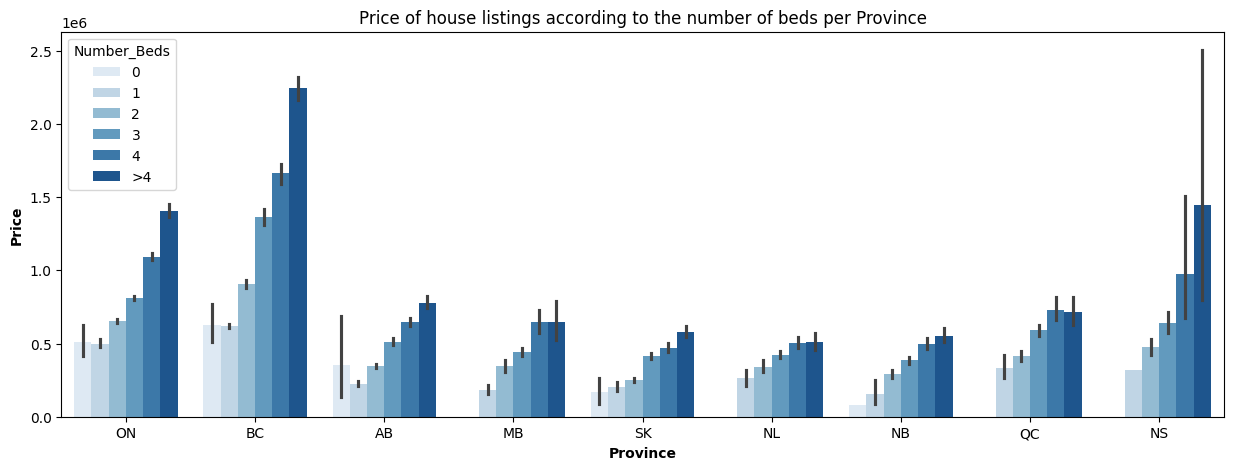

In [58]:
plt.figure(figsize = (15,5))
hue_order = ['0','1','2','3','4','>4']
sns.barplot(data = df,x = 'Province',y = 'Price', hue = 'Number_Beds', hue_order = hue_order, palette = "Blues")
plt.title("Price of house listings according to the number of beds per Province")
plt.xlabel('Province',fontweight = 'bold')
plt.ylabel('Price',fontweight = 'bold')
plt.show()

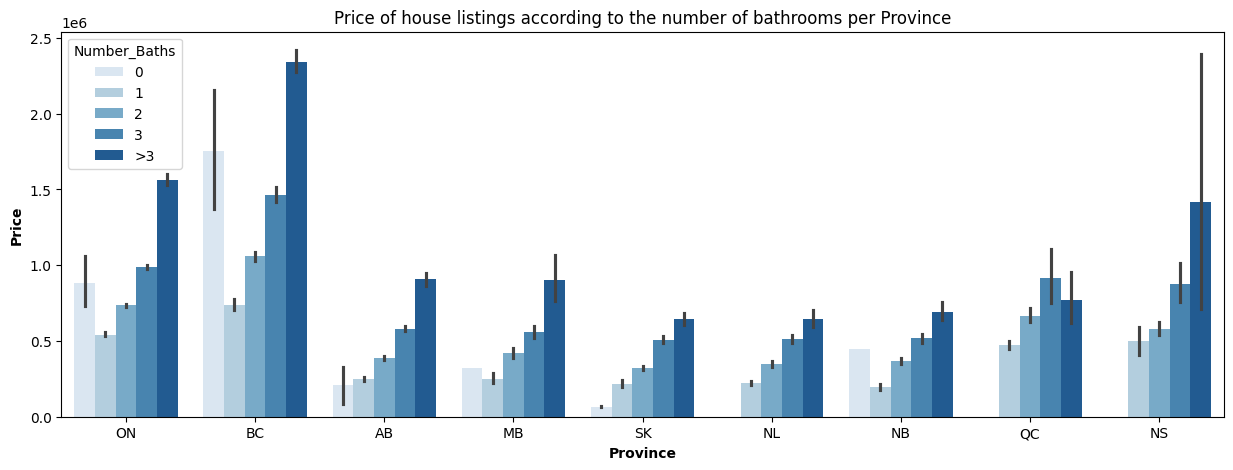

In [59]:
plt.figure(figsize = (15,5))
hue_order = ['0','1','2','3','>3']
sns.barplot(data = df,x = 'Province',y = 'Price', hue = 'Number_Baths', hue_order = hue_order, palette = "Blues")
plt.title("Price of house listings according to the number of bathrooms per Province")
plt.xlabel('Province',fontweight = 'bold')
plt.ylabel('Price',fontweight = 'bold')
plt.show()

Obsrevations:
1. I can see some weird things in this data which do not make sense to me. There are some provinces which have house listings with zero bathrooms that have higher price than house listings with one bathroom. I need to investigate this further. Same is the case with the number of bedrooms as well.
2. Alberta has the highest median income per family with the cost of house which is not too high.
3. British Columbia has costliest houses in all of Canada by a huge margin.
4. Caledon city has the highest median income per family and also has most expensive houses in Canada.